https://medium.com/@pichitchai.pim/%E0%B8%AB%E0%B8%B2-insights-%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%8B%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%AA%E0%B8%B4%E0%B8%99%E0%B8%84%E0%B9%89%E0%B8%B2-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84-exploratory-data-analysis-eda-32d65c382b09

In [44]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib as mpl
import seaborn as sns
# libs for fetching  data from google trend
#from pytrends import dailydata

#from tvDatafeed import TvDatafeed

import ccxt



# Prepare Datasets

#### Import Price and Volume data from csv

In [2]:

df_bitkub_eth = pd.read_csv('./eth_ohclv_bitkub.csv')
df_bitkub_btc = pd.read_csv('./btc_ohclv_bitkub.csv')
df_bitkub_kub = pd.read_csv('./kub_ohclv_bitkub.csv')

In [47]:
df_binance_eth = pd.read_csv('./eth_ohclv_binance.csv')
df_binance_btc = pd.read_csv('./btc_ohclv_binance.csv')
df_binance_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1884 non-null   object 
 1   symbol    1884 non-null   object 
 2   open      1884 non-null   float64
 3   high      1884 non-null   float64
 4   low       1884 non-null   float64
 5   close     1884 non-null   float64
 6   volume    1884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 103.2+ KB


In [48]:
df_binance_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1884 non-null   object 
 1   symbol    1884 non-null   object 
 2   open      1884 non-null   float64
 3   high      1884 non-null   float64
 4   low       1884 non-null   float64
 5   close     1884 non-null   float64
 6   volume    1884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 103.2+ KB


In [51]:
print('----- Bitkub data ------')
print('BTC start date :',df_bitkub_btc['datetime'].iloc[0])
print('BTC end date :',df_bitkub_btc['datetime'].iloc[-1])
print('\n')
print('ETH start date :', df_bitkub_eth['datetime'].iloc[0])
print('ETH end date :', df_bitkub_eth['datetime'].iloc[-1])
print('\n')

print('KUB start date', df_bitkub_kub['datetime'].iloc[0])
print('KUB end date', df_bitkub_kub['datetime'].iloc[-1])

print('\n----- Binance data ------')
print('BTC start date', df_binance_btc['datetime'].iloc[0])
print('BTC end date', df_binance_btc['datetime'].iloc[0])

print('\nETH start date', df_binance_eth['datetime'].iloc[0])
print('ETH end date', df_binance_eth['datetime'].iloc[0])


----- Bitkub data ------
BTC start date : 2018-05-09
BTC end date : 2022-10-12


ETH start date : 2018-05-09
ETH end date : 2022-10-12


KUB start date 2021-05-20
KUB end date 2022-10-12

----- Binance data ------
BTC start date 2017-08-17 07:00:00
BTC end date 2017-08-17 07:00:00

ETH start date 2017-08-17 07:00:00
ETH end date 2017-08-17 07:00:00


##### Check na

In [54]:
print('Bitkub na \n')
print('Sum of NA row :',df_bitkub_btc.isna().sum())
print('\nSum of NA row :',df_bitkub_eth.isna().sum())
print('\nSum of NA row :',df_bitkub_kub.isna().sum())

print('\nBiannce na')
print('Sum of NA row :', df_binance_btc.isna().sum())
print('Sum of NA row :', df_binance_eth.isna().sum())


Bitkub na 

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

Biannce na
Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
Sum of NA row : datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


In [5]:
df_bitkub_btc

,datetime,symbol,open,high,low,close,volume
0,2018-05-09,BITKUB:BTCTHB,293000.00,300000.00,287000.00,295950.00,2.132158
1,2018-05-10,BITKUB:BTCTHB,295950.00,299000.00,289351.00,299000.00,0.536473
2,2018-05-11,BITKUB:BTCTHB,294005.00,296000.00,270150.00,270150.00,1.889688
3,2018-05-12,BITKUB:BTCTHB,270151.00,288253.00,270150.00,280000.00,0.231786
4,2018-05-13,BITKUB:BTCTHB,280000.00,288252.00,277000.00,277200.00,1.817175
...,...,...,...,...,...,...,...
1613,2022-10-08,BITKUB:BTCTHB,730604.94,738045.00,727605.00,731418.74,69.469531
1614,2022-10-09,BITKUB:BTCTHB,731854.38,732850.00,723045.01,730728.57,68.305813
1615,2022-10-10,BITKUB:BTCTHB,731494.93,732999.99,724000.00,725100.00,88.753887
1616,2022-10-11,BITKUB:BTCTHB,725999.84,731999.99,717194.00,726539.99,89.960297


#### Import google trend data from csv

In [6]:
# fetch google trend
#bitkub = dailydata.get_daily_data('bitkub', 2020, 12, 2022, 9)
#bitkub.to_csv('./bitkub_trend.csv')

In [7]:
df = pd.read_csv('./bitkub_trend.csv')

In [8]:
df = df.set_index('date')

In [9]:
df.info()

# column name 'bitkub', scaled

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 2020-12-01 to 2022-09-04
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bitkub_unscaled  643 non-null    int64  
 1   bitkub_monthly   638 non-null    float64
 2   isPartial        92 non-null     object 
 3   scale            638 non-null    float64
 4   bitkub           638 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 30.1+ KB


In [10]:
df.describe()

,bitkub_unscaled,bitkub_monthly,scale,bitkub
count,643.000000,638.000000,638.000000,638.000000
mean,12.220840,15.503135,0.155031,2.054577
std,27.303722,23.537454,0.235375,8.119798
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,30.000000,0.300000,0.000000
max,100.000000,100.000000,1.000000,60.000000


In [11]:
df

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-01,0,NaN,NaN,NaN,NaN
2020-12-02,97,NaN,NaN,NaN,NaN
2020-12-03,100,NaN,NaN,NaN,NaN
2020-12-04,0,NaN,NaN,NaN,NaN
2020-12-05,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-31,0,27.0,NaN,0.27,0.0
2022-09-01,0,27.0,NaN,0.27,0.0
2022-09-02,0,27.0,NaN,0.27,0.0


In [12]:
# check na
print('Sum of NA row :',df['bitkub'].isna().sum())
# loc 'bitkub' col != na
df = df.loc[~df['bitkub'].isna()]


Sum of NA row : 5


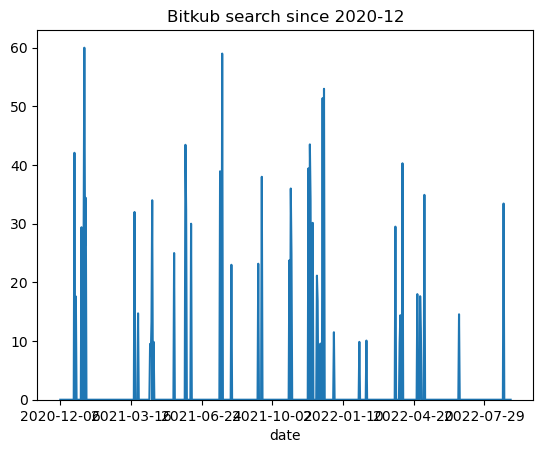

In [13]:
df['bitkub'].plot()
plt.bar(df.index, df['bitkub'])
plt.title('Bitkub search since 2020-12')
#plt.figure(figsize=(25,5))
mpl.rcParams['figure.figsize'] = [45, 10]
plt.show()

In [14]:
# count search == 0
not0 = df.loc[df['bitkub'] != 0]
print('Days bitkub was search :', len(not0))

# Turn days search to percent
days_search_percent = len(not0)/len(df)
print(f'Days bitkub was search in percent :{days_search_percent:.4f}')

print('Rows bitkub search == 0 :',len(df.loc[df['bitkub'] == 0]))


Days bitkub was search : 48
Days bitkub was search in percent :0.0752
Rows bitkub search == 0 : 590


In [15]:
df.loc[(df['bitkub'] == 0) & (df['bitkub_unscaled'] == 0)]

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-06,0,35.0,False,0.35,0.0
2020-12-07,0,35.0,NaN,0.35,0.0
2020-12-08,0,35.0,NaN,0.35,0.0
2020-12-09,0,35.0,NaN,0.35,0.0
2020-12-10,0,35.0,NaN,0.35,0.0
...,...,...,...,...,...
2022-08-30,0,27.0,NaN,0.27,0.0
2022-08-31,0,27.0,NaN,0.27,0.0
2022-09-01,0,27.0,NaN,0.27,0.0


In [16]:
not0.head(5)

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-26,69,61.0,NaN,0.61,42.09
2020-12-28,80,22.0,NaN,0.22,17.60
2021-01-05,49,60.0,NaN,0.60,29.40
2021-01-08,46,60.0,NaN,0.60,27.60
2021-01-09,100,60.0,NaN,0.60,60.00


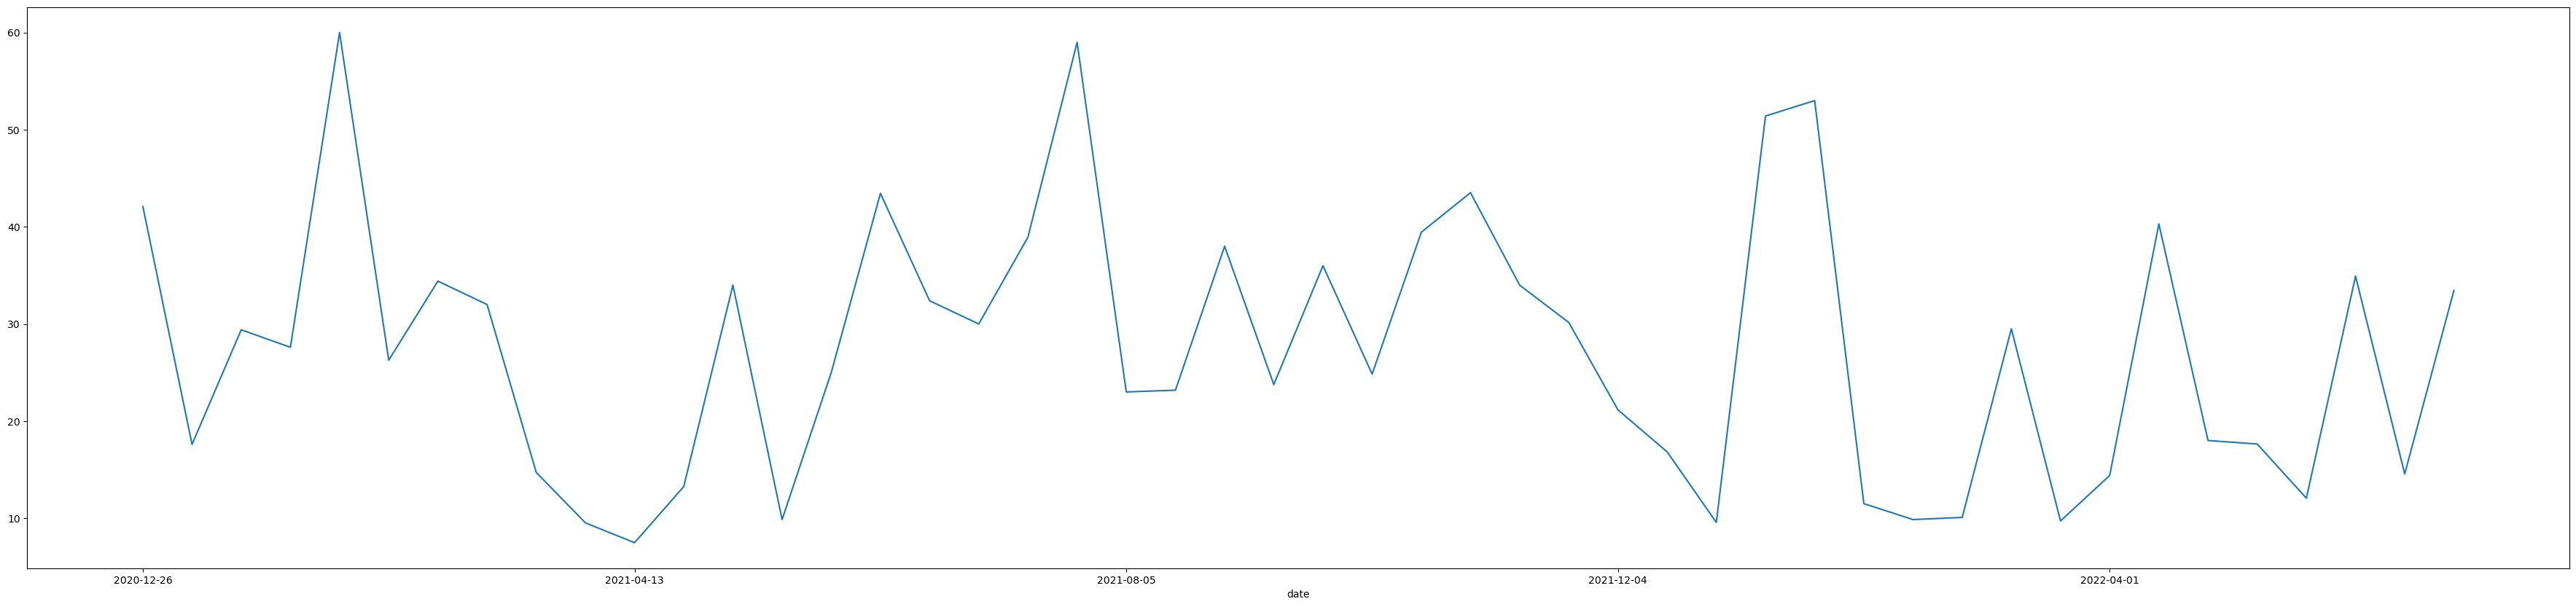

In [17]:
#df.loc[df['bitkub'] != 0]
not0['bitkub'].plot()
plt.show()

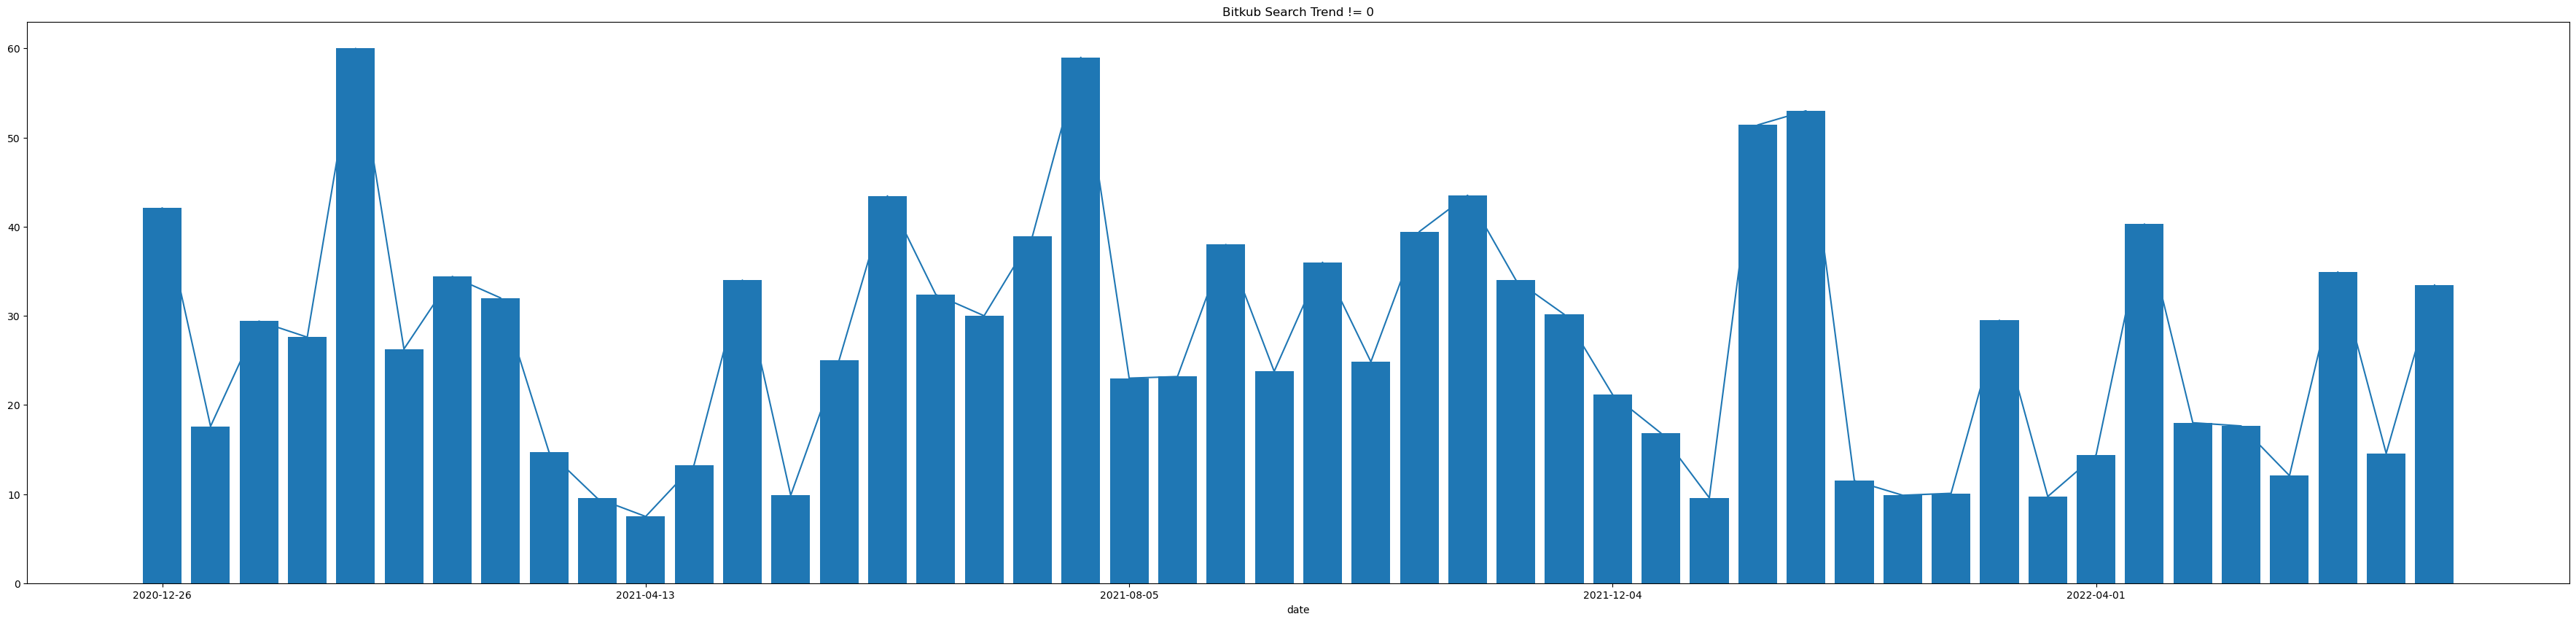

In [18]:
not0['bitkub'].plot()
plt.bar(not0.index, not0['bitkub'])
plt.title('Bitkub Search Trend != 0')
plt.show()

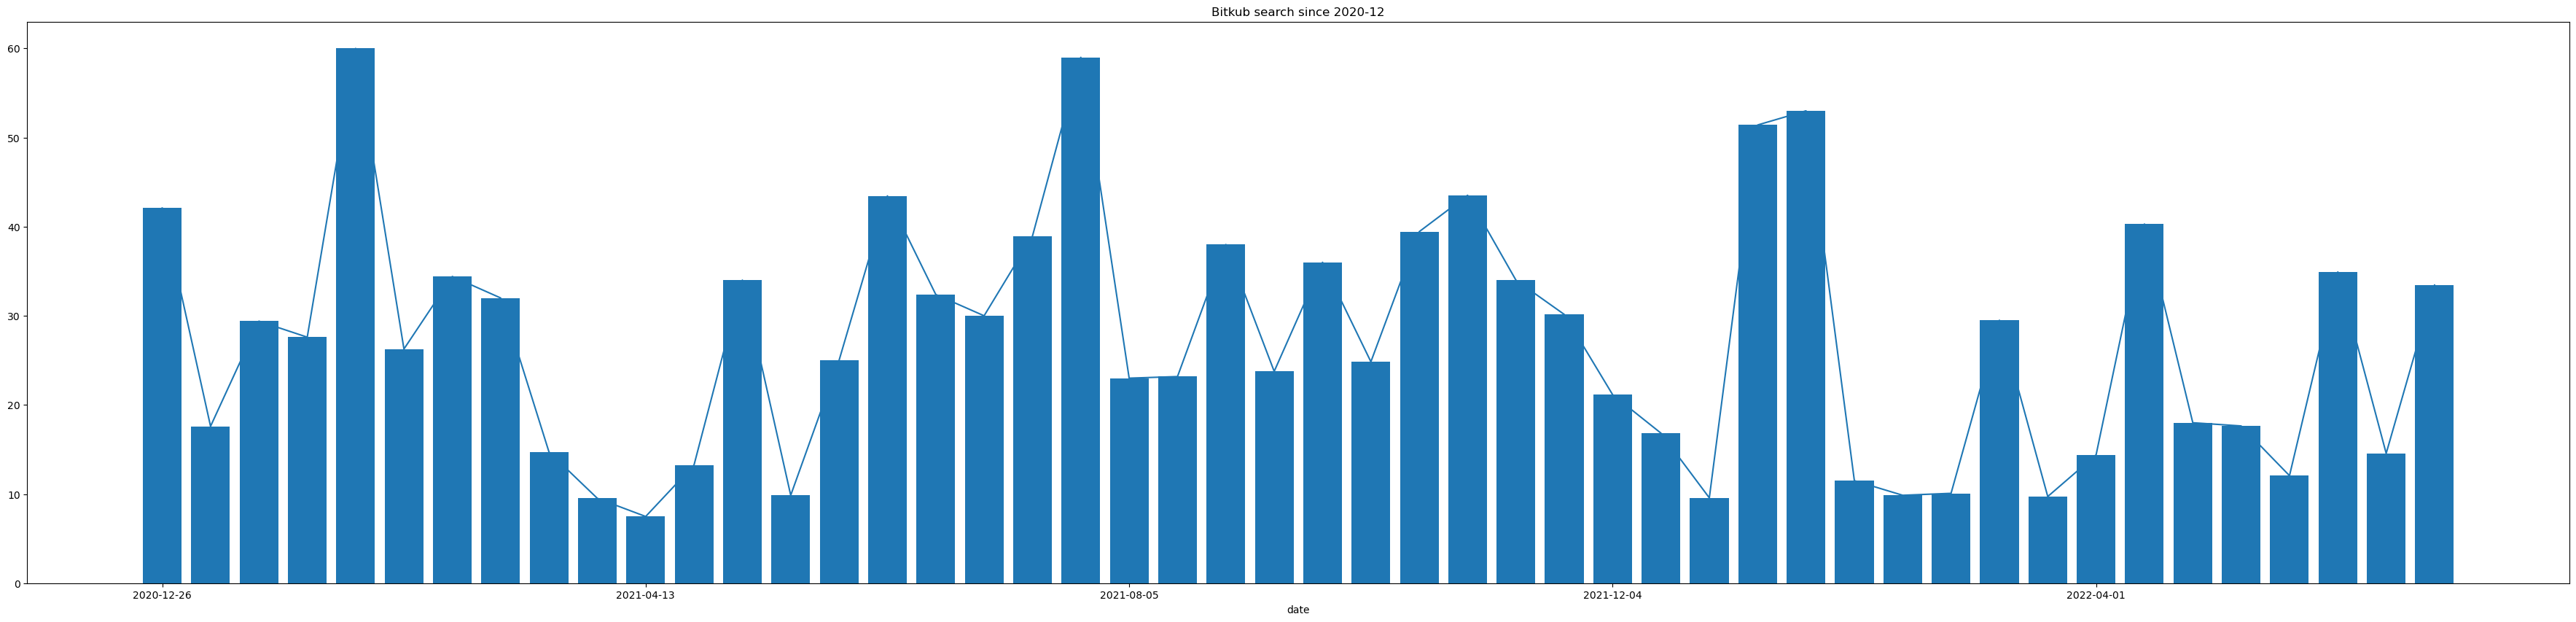

In [19]:
not0['bitkub'].plot()
plt.bar(not0.index, not0['bitkub'])
plt.title('Bitkub search since 2020-12')
plt.show()

#### Prep coins data

In [56]:
eth_binance = df_binance_eth
btc_binance = df_binance_btc
eth_binance.columns

Index(['datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [20]:
new_btc = df_bitkub_btc#.set_index(['datetime'])
new_eth = df_bitkub_eth#.set_index(['datetime'])
new_kub = df_bitkub_kub#.set_index(['datetime'])
new_btc.columns

Index(['datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [21]:
df_bitkub_btc.head(1)
#df_bitkub_eth.head(1)

,datetime,symbol,open,high,low,close,volume
0,2018-05-09,BITKUB:BTCTHB,293000.0,300000.0,287000.0,295950.0,2.132158


#### Combine pricing dataframe

In [89]:
# Marge binance pricing df on datetime
df_coins_binance = pd.merge(btc_binance, eth_binance, how='left', left_on='datetime', right_on='datetime', suffixes= ['_btc_binance', '_eth_biannce'])
df_coins_binance.head()

,datetime,symbol_btc_binance,open_btc_binance,high_btc_binance,low_btc_binance,close_btc_binance,volume_btc_binance,symbol_eth_biannce,open_eth_biannce,high_eth_biannce,low_eth_biannce,close_eth_biannce,volume_eth_biannce
0,2017-08-17 07:00:00,BINANCE:BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,BINANCE:ETHUSDT,301.13,312.18,298.00,302.00,7030.71034
1,2017-08-18 07:00:00,BINANCE:BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,BINANCE:ETHUSDT,302.00,311.79,283.94,293.96,9537.84646
2,2017-08-19 07:00:00,BINANCE:BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,BINANCE:ETHUSDT,293.96,299.90,278.00,290.91,2146.19773
3,2017-08-20 07:00:00,BINANCE:BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,BINANCE:ETHUSDT,290.91,300.53,282.85,299.10,2510.13871
4,2017-08-21 07:00:00,BINANCE:BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,BINANCE:ETHUSDT,299.10,346.52,294.60,323.29,5219.44542


In [90]:
# merge two bitkub pricing dataframe on datetime column
df_coins = pd.merge(new_btc, new_eth, how='left', left_on= 'datetime', right_on= 'datetime', suffixes= ['_btc_bitkub', '_eth_bitkub'])
df_coins.head()

,datetime,symbol_btc_bitkub,open_btc_bitkub,high_btc_bitkub,low_btc_bitkub,close_btc_bitkub,volume_btc_bitkub,symbol_eth_bitkub,open_eth_bitkub,high_eth_bitkub,low_eth_bitkub,close_eth_bitkub,volume_eth_bitkub
0,2018-05-09,BITKUB:BTCTHB,293000.0,300000.0,287000.0,295950.0,2.132158,BITKUB:ETHTHB,22500.0,23800.0,21500.0,23700.0,18.387816
1,2018-05-10,BITKUB:BTCTHB,295950.0,299000.0,289351.0,299000.0,0.536473,BITKUB:ETHTHB,23800.0,24000.0,23800.0,24000.0,4.644577
2,2018-05-11,BITKUB:BTCTHB,294005.0,296000.0,270150.0,270150.0,1.889688,BITKUB:ETHTHB,24200.0,24200.0,22150.0,22500.0,8.693208
3,2018-05-12,BITKUB:BTCTHB,270151.0,288253.0,270150.0,280000.0,0.231786,BITKUB:ETHTHB,23000.0,23000.0,21000.0,22250.0,6.635473
4,2018-05-13,BITKUB:BTCTHB,280000.0,288252.0,277000.0,277200.0,1.817175,BITKUB:ETHTHB,22250.0,23200.0,22000.0,23200.0,7.472291


In [60]:
# Merge bitkub with binance data
df_coins_both = pd.merge(df_coins_binance, df_coins, left_on='datetime', right_on='datetime')
df_coins_both.head()

,datetime,symbol_btc_binance,open_btc_binance,high_btc_binance,low_btc_binance,close_btc_binance,volume_btc_binance,symbol_eth_biannce,open_eth_biannce,high_eth_biannce,...,high_btc_bitkub,low_btc_bitkub,close_btc_bitkub,volume_btc_bitkub,symbol_eth_bitkub,open_eth_bitkub,high_eth_bitkub,low_eth_bitkub,close_eth_bitkub,volume_eth_bitkub


#### Adjust binance data datetime format

In [91]:
import datetime

In [ ]:
df_coins

In [93]:
#df_coins_binance.head()
binance_time = df_coins_binance['datetime'][0]
bitkub_time = df_coins['datetime'][0]
print('Binance time ',binance_time)
print('type binance time',type(binance_time))
print('Biktub time ',bitkub_time)
print('type bitkub time',type(bitkub_time))



Binance time 2017-08-17 07:00:00
type binance time <class 'str'>
Bitkub time 2018-05-09
type bitkub time <class 'str'>


In [95]:
df_coins_binance['datetime'] = pd.to_datetime(df_coins_binance['datetime']).dt.date


In [96]:
print('previous datetime', binance_time)
print('new date', df_coins_binance['datetime'][0])

previous datetime 2017-08-17 07:00:00
new date 2017-08-17


In [103]:
df_coins_both.columns

Index(['datetime', 'symbol_btc_binance', 'open_btc_binance',
       'high_btc_binance', 'low_btc_binance', 'close_btc_binance',
       'volume_btc_binance', 'symbol_eth_biannce', 'open_eth_biannce',
       'high_eth_biannce', 'low_eth_biannce', 'close_eth_biannce',
       'volume_eth_biannce', 'datetime', 'symbol_btc_bitkub',
       'open_btc_bitkub', 'high_btc_bitkub', 'low_btc_bitkub',
       'close_btc_bitkub', 'volume_btc_bitkub', 'symbol_eth_bitkub',
       'open_eth_bitkub', 'high_eth_bitkub', 'low_eth_bitkub',
       'close_eth_bitkub', 'volume_eth_bitkub'],
      dtype='object')

In [107]:
# Merge bitkub and binance data again
#df_coins_both = pd.merge(df_coins_binance, df_coins, left_on='datetime', right_on='datetime')
#df_coins_both.head()

df_coins_both = pd.concat([df_coins_binance, df_coins], axis=1)
df_coins_both.head(1)
print('rows binance before concat ', len(df_coins_binance))
print('rows bitkub before concat ', len(df_coins))

print('\nrows after concat ', len(df_coins_both))
print('NA row in bitkub data', df_coins_both['volume_btc_bitkub'].isna().sum())


rows binance before concat  1884
rows bitkub before concat  1618

rows after concat  1884
NA row in bitkub data 266


In [23]:
df_coins = df_coins[['datetime', 'close_btc', 'volume_btc', 'close_eth', 'volume_eth']]
df_coins

,datetime,close_btc,volume_btc,close_eth,volume_eth
0,2018-05-09,295950.00,2.132158,23700.00,18.387816
1,2018-05-10,299000.00,0.536473,24000.00,4.644577
2,2018-05-11,270150.00,1.889688,22500.00,8.693208
3,2018-05-12,280000.00,0.231786,22250.00,6.635473
4,2018-05-13,277200.00,1.817175,23200.00,7.472291
...,...,...,...,...,...
1613,2022-10-08,731418.74,69.469531,49819.62,855.087887
1614,2022-10-09,730728.57,68.305813,49692.60,899.807182
1615,2022-10-10,725100.00,88.753887,49242.00,1072.780040
1616,2022-10-11,726539.99,89.960297,49108.22,1364.960923


In [24]:
df

,bitkub_unscaled,bitkub_monthly,isPartial,scale,bitkub
date,,,,,
2020-12-06,0,35.0,False,0.35,0.0
2020-12-07,0,35.0,NaN,0.35,0.0
2020-12-08,0,35.0,NaN,0.35,0.0
2020-12-09,0,35.0,NaN,0.35,0.0
2020-12-10,0,35.0,NaN,0.35,0.0
...,...,...,...,...,...
2022-08-31,0,27.0,NaN,0.27,0.0
2022-09-01,0,27.0,NaN,0.27,0.0
2022-09-02,0,27.0,NaN,0.27,0.0


In [25]:
type(df.index)

pandas.core.indexes.base.Index

In [26]:
df_coins.set_index(['datetime'])

,close_btc,volume_btc,close_eth,volume_eth
datetime,,,,
2018-05-09,295950.00,2.132158,23700.00,18.387816
2018-05-10,299000.00,0.536473,24000.00,4.644577
2018-05-11,270150.00,1.889688,22500.00,8.693208
2018-05-12,280000.00,0.231786,22250.00,6.635473
2018-05-13,277200.00,1.817175,23200.00,7.472291
...,...,...,...,...
2022-10-08,731418.74,69.469531,49819.62,855.087887
2022-10-09,730728.57,68.305813,49692.60,899.807182
2022-10-10,725100.00,88.753887,49242.00,1072.780040


In [27]:
# merge coins data with search trend
df_joined = pd.merge(df, df_coins, how='left', left_index= True, right_on= 'datetime')
df_joined.set_index('datetime', inplace= True)


In [28]:
df_joined = df_joined.iloc[:,4:]

In [29]:

df_joined.rename(columns={'bitkub': 'googletrend'}, inplace= True)
df_joined

,googletrend,close_btc,volume_btc,close_eth,volume_eth
datetime,,,,,
2020-12-06,0.0,579994.22,145.801752,18000.00,1692.904166
2020-12-07,0.0,580600.00,165.108189,17935.00,1606.013348
2020-12-08,0.0,573077.73,307.878653,17450.02,3049.675731
2020-12-09,0.0,559302.86,638.214088,17346.42,5347.911585
2020-12-10,0.0,551194.69,277.778894,16955.00,1840.982009
...,...,...,...,...,...
2022-08-31,0.0,728000.45,142.028756,56306.69,4506.912619
2022-09-01,0.0,719664.94,115.642678,56330.00,3859.938572
2022-09-02,0.0,733649.52,144.389379,58632.83,3877.928573


#### Processcing

In [30]:
# Create % change column from each closes and volumes

In [31]:
df_joined.head()

,googletrend,close_btc,volume_btc,close_eth,volume_eth
datetime,,,,,
2020-12-06,0.0,579994.22,145.801752,18000.00,1692.904166
2020-12-07,0.0,580600.00,165.108189,17935.00,1606.013348
2020-12-08,0.0,573077.73,307.878653,17450.02,3049.675731
2020-12-09,0.0,559302.86,638.214088,17346.42,5347.911585
2020-12-10,0.0,551194.69,277.778894,16955.00,1840.982009


In [32]:
# calculate % change per day
df_joined['btc_close_1d_chg'] = df_joined['close_btc'].pct_change(1)

In [33]:
# shift back to the same google trend date
df_joined['btc_close_1d_chg'] = df_joined['btc_close_1d_chg'].shift(-1)

In [34]:
df_joined['btc_vol_1d_chg'] = df_joined['volume_btc'].pct_change(1).shift(-1)
##df_joined['btc_close_1d_chg'] = df_joined['btc_close_1d_chg'].shift(-1)

In [35]:
df_joined

,googletrend,close_btc,volume_btc,close_eth,volume_eth,btc_close_1d_chg,btc_vol_1d_chg
datetime,,,,,,,
2020-12-06,0.0,579994.22,145.801752,18000.00,1692.904166,0.001044,0.132416
2020-12-07,0.0,580600.00,165.108189,17935.00,1606.013348,-0.012956,0.864709
2020-12-08,0.0,573077.73,307.878653,17450.02,3049.675731,-0.024037,1.072940
2020-12-09,0.0,559302.86,638.214088,17346.42,5347.911585,-0.014497,-0.564756
2020-12-10,0.0,551194.69,277.778894,16955.00,1840.982009,-0.013312,0.105893
...,...,...,...,...,...,...,...
2022-08-31,0.0,728000.45,142.028756,56306.69,4506.912619,-0.011450,-0.185780
2022-09-01,0.0,719664.94,115.642678,56330.00,3859.938572,0.019432,0.248582
2022-09-02,0.0,733649.52,144.389379,58632.83,3877.928573,-0.014448,-0.288828


In [36]:
# recheck pct_change method
print('Value via pct_change method :', df_joined['btc_close_1d_chg'][0])
print('Value via calculate method :',(df_joined['close_btc'][1] - df_joined['close_btc'][0]) / df_joined['close_btc'][0])

Value via pct_change method : 0.0010444586844331472
Value via calculate method : 0.0010444586844331448


In [37]:
df_joined_searched = df_joined.loc[df_joined['googletrend'] != 0]

In [38]:
df_joined_searched = df_joined_searched[['googletrend', 'btc_close_1d_chg', 'btc_vol_1d_chg']]

In [39]:

# ! Outlier in btc vol change 

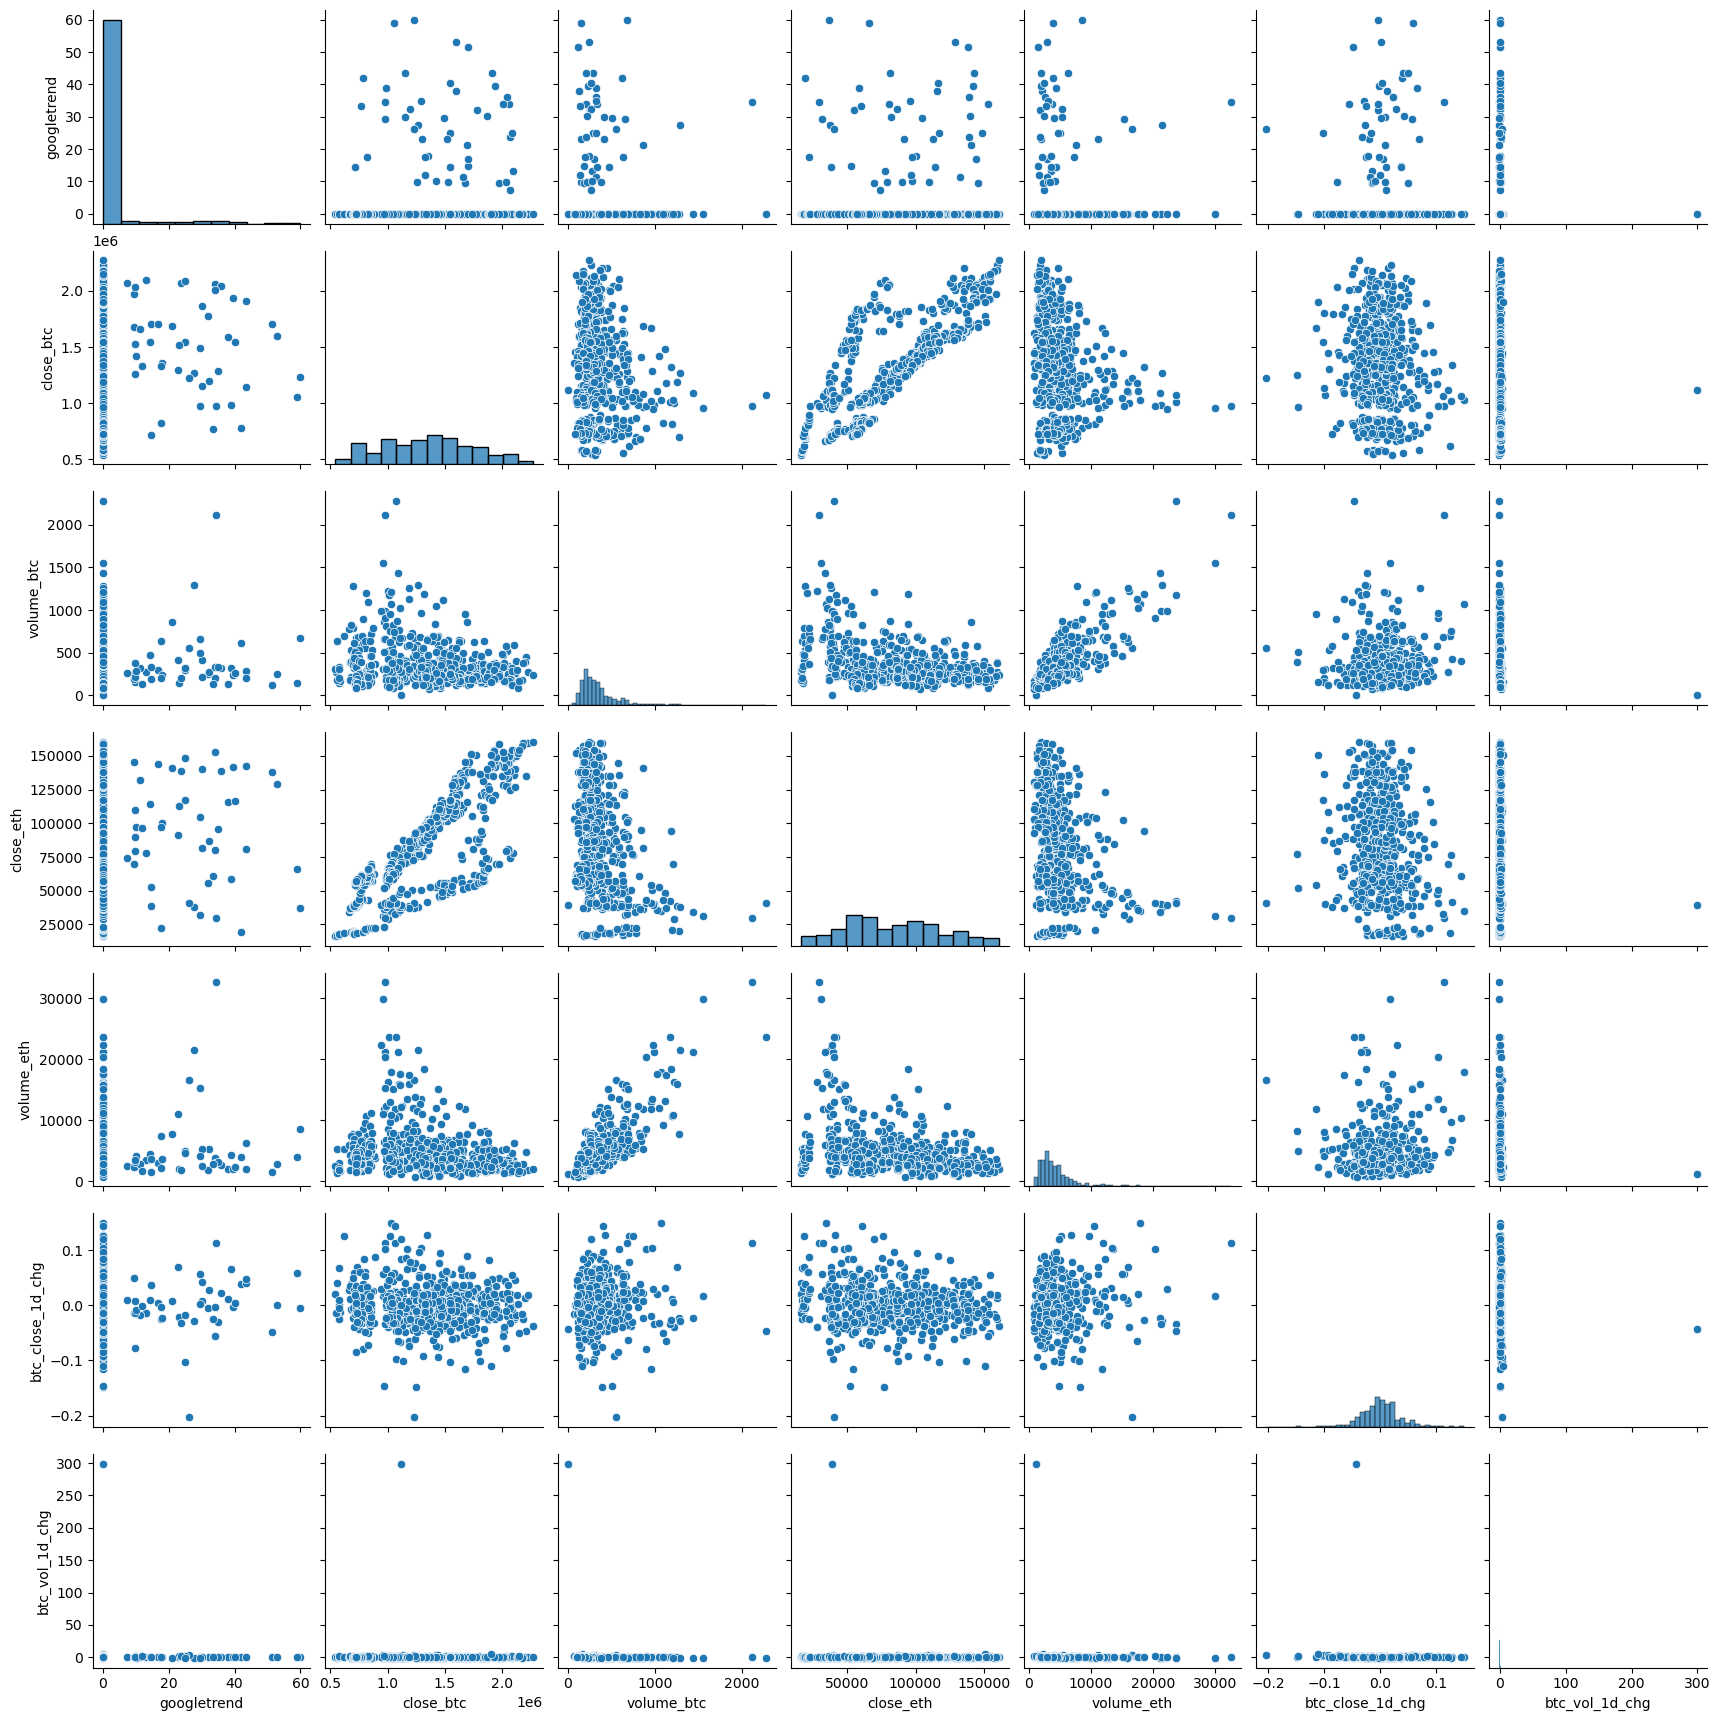

In [40]:
sns.pairplot(df_joined)
plt.show()

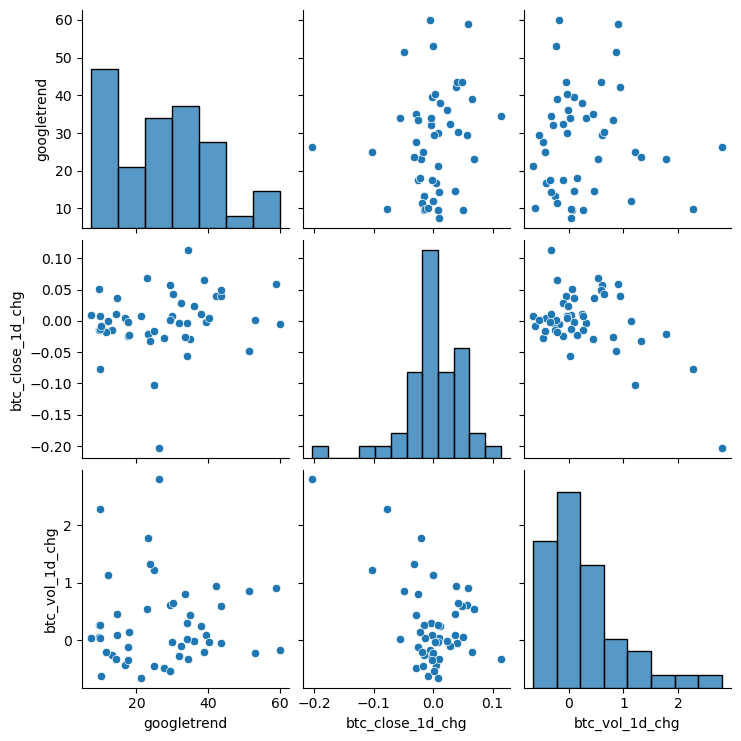

In [41]:
sns.pairplot(df_joined_searched)
plt.show()

In [42]:
# plot % chg and searching demand
# 1 include no search days
#sns.heatmap(df_joined_searched[['googletrend', 'btc_close_1d_chg']])
#sns.heatmap(df_joined_searched)
#mpl.rcParams['figure.figsize'] = [10, 10]
#plt.show()
# 2 only search days

In [43]:
df_joined.loc['2021-01-01': '2021-02']

,googletrend,close_btc,volume_btc,close_eth,volume_eth,btc_close_1d_chg,btc_vol_1d_chg
datetime,,,,,,,
2021-01-01,0.00,892989.00,371.150458,22421.15,3783.402708,0.087606,0.789371
2021-01-02,0.00,971220.12,664.125971,23350.09,6475.703306,0.029634,0.845705
2021-01-03,0.00,1000001.00,1225.780866,28700.00,16217.316016,-0.039901,0.267952
2021-01-04,0.00,960099.95,1554.230697,30937.95,29925.174432,0.017603,-0.573970
2021-01-05,29.40,977000.15,662.148162,32149.99,15298.164636,0.056909,0.609958
2021-01-06,0.00,1032600.02,1066.030923,34888.00,17978.191623,0.149525,0.177758
2021-01-07,0.00,1187000.00,1255.525970,38805.00,16022.284386,0.069925,0.029780
2021-01-08,27.60,1270001.00,1292.914981,37797.92,21493.347010,-0.027946,-0.475833
2021-01-09,60.00,1234509.98,677.703909,37010.08,8578.917711,-0.004463,-0.176968


- ต้องหาทางเอา Volume จาก Binance มา แล้วนำมาเปรียบเทียบกับ Vol จาก Bitkub (อาจจะใช้วิธีการหา Excess return, %chg_bitkub - %chg_binance )
-- เรียกดู Correlation หวะหว่าง volume 2 ตลาด
- ตัด Outliers
- ลองเพิ่มวัน % chg (pct_change(7).shift(-7))

เมื่อสำเร็จแล้ว เอา Volume ของ ETH มาด้วยเพื่อลดความแกว่งของ Volume ที่เกิดจากปัจจัยของราคาเหรียญ

สุดท้ายเอา Volume and Return bitkub มาเทียบ ซึ่งเป็นตัวที่น่าจะมีนัยยะที่สุด